In [151]:
from hdx.utilities.easy_logging import setup_logging
from hdx.hdx_configuration import Configuration
from hdx.data.dataset import Dataset
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
setup_logging()
Configuration.create(hdx_site='prod', user_agent='A_Quick_Example', hdx_read_only=True)

No logging configuration parameter. Using default.
Loading logging configuration from: c:\users\cheneli\anaconda3\lib\site-packages\hdx\utilities\logging_configuration.yml
INFO - 2019-02-27 21:29:38 - hdx.hdx_configuration - No HDX base configuration parameter. Using default base configuration file: c:\users\cheneli\anaconda3\lib\site-packages\hdx\hdx_base_configuration.yml.
INFO - 2019-02-27 21:29:38 - hdx.hdx_configuration - Loading HDX base configuration from: c:\users\cheneli\anaconda3\lib\site-packages\hdx\hdx_base_configuration.yml
INFO - 2019-02-27 21:29:38 - hdx.hdx_configuration - No HDX configuration parameter and no configuration file at default path: C:\Users\cheneli\.hdx_configuration.yml.
INFO - 2019-02-27 21:29:38 - hdx.hdx_configuration - Read only access to HDX: True


'https://data.humdata.org/'

In [7]:
#Check if the dataset has at least 1 resource of the required file type(s).

def check_type(dataset, file_types=[]):
    temp_dataset = Dataset.read_from_hdx(dataset)
    temp_dataset.separate_resources()
    if (len(temp_dataset.resources) > 0):
        if (len(file_types) > 0):
            if (not set(temp_dataset.get_filetypes()).isdisjoint(file_types)): 
                    return True
        else :
            return True
    return False

In [8]:
# Check if the dataset is tagged with HXL tag, not provided by HXL

def check_organization(dataset):
    if dataset.get_organization()['title'] != 'Humanitarian Exchange Language(HXL)':
            return True
    return False

In [73]:
# Download one dataset with certain type(s), read it into Dataframe, 
# add all headers, tags and dataset names to our DataFrame,
# and delete the dataset

def process_dataset_2(dataset, file_type, dataframe, download_path, index, row_limit = 10):
    global count
# Download one dataset and read it into a DataFrame 
    if (file_type == None):
        url, path = dataset_1.resources[0].download(download_path)
        pandas_dataset = pd.read_csv(path)
    else:
        if (file_type not in dataset.get_filetypes()):
            return 'Error: Required file type not in dataset OR dataset does not contain any resources.'
        try:
            url, path = dataset.resources[dataset.get_filetypes().index(file_type)].download(download_path)
            print('Resource URL %s downloaded to %s' % (url, path))
            pandas_dataset = pd.read_csv(path, encoding='latin-1')
            pandas_dataset = pandas_dataset.head(row_limit)
        except:
            return 'Unknown error.'
     
    #if "HXL" in os.path.basename(path) or "hxl" in os.path.basename(path):
        #return dataset_df
    
# Add headers, tags and data to our DataFrame if current dataset not empty
        if (not pandas_dataset.empty):
            dataset_df = pandas_dataset
            headers = list(dataset_df.columns.values)
            tags = list(dataset_df.iloc[0,:])
            for i in range(len(headers)):
                try:
                    dic = {'Header': headers[i], 'Tag': tags[i], 'Data': list(dataset_df.iloc[1:, i]), 
                           'Relative Column Position': (i+1) / len(dataset_df.columns), 
                           'Dataset_name': os.path.basename(path), 'Index': index}
                    headers_and_tags.loc[len(headers_and_tags)] = dic
                except:
                    print("Error: different number of headers and tags")
            count += 1
        os.remove(path)
        print("File Removed!")
        return

In [74]:
# Search for all datasets with HXL tags

datasets_HXL = Dataset.search_in_hdx('HXL')
len(datasets_HXL)

INFO - 2019-02-28 00:59:36 - requests.packages.urllib3.connectionpool - Resetting dropped connection: data.humdata.org


3398

In [72]:
# Create a DataFrame for all headers and tags

col_names = ['Header', 'Tag', 'Data','Relative Column Position','Dataset_name', 'Index']
headers_and_tags= pd.DataFrame(columns = col_names)

In [81]:
count = 0
for i in range(100):
    process_dataset_2(datasets_HXL[i], 'CSV', headers_and_tags, './datasets', count)
    print(i)

INFO - 2019-02-28 01:08:21 - requests.packages.urllib3.connectionpool - Starting new HTTPS connection (1): docs.google.com
Resource URL https://docs.google.com/spreadsheets/d/1En9FlmM8PrbTWgl3UHPF_MXnJ6ziVZFhBbojSJzBdLI/pub?gid=319251406&single=true&output=csv downloaded to ./datasets\hxl-core-hashtag-schema.csv22.CSV
File Removed!
0
INFO - 2019-02-28 01:08:22 - requests.packages.urllib3.connectionpool - Starting new HTTPS connection (1): docs.google.com
Resource URL https://docs.google.com/spreadsheets/d/e/2PACX-1vRiQVi4J8HMWACq6JJpKT1EfKcwYh3xhYmNrgz9Qo9NBngoQxFRKxDPkhu09RrWj81D0fsKJ4PDoYdI/pub?output=csv downloaded to ./datasets\HXL master vocabulary list20.CSV
File Removed!
1
2
INFO - 2019-02-28 01:08:22 - requests.packages.urllib3.connectionpool - Starting new HTTPS connection (1): docs.google.com
Resource URL https://docs.google.com/spreadsheets/d/1c9wehuauQAAegElIRI6vhWktKSI-PcPjHHiXdqASonk/export?format=csv&gid=1170456449 downloaded to ./datasets\Functional Roles (Beta) - CSV1.

In [83]:
headers_and_tags.to_excel("headerandtag.xlsx")

In [82]:
headers_and_tags.head(200)
#QUESTION: any ideas how to standardize the column position? 
#ALSO ADD THE ORGANIZATION OF THE DATA TO THE DATAFRAME

,Header,Tag,Data,Relative Column Position,Dataset_name,Index
0,https://api.idmcdb.org/api/disaster_data?ci=HD...,#valid_tag,"[#access, #activity, #adm1, #adm2, #adm3, #adm...",0.10,hxl-core-hashtag-schema.csv22.CSV,0.0
1,Hashtag one-liner,#description +short +en,"[Access ability/constraints, Programme, projec...",0.20,hxl-core-hashtag-schema.csv22.CSV,0.0
2,Hashtag long description,#description +long +en,[Accessiblity and constraints on access to a m...,0.30,hxl-core-hashtag-schema.csv22.CSV,0.0
3,Release status,#status,"[Released, Released, Released, Released, Relea...",0.40,hxl-core-hashtag-schema.csv22.CSV,0.0
4,Data type restriction,#valid_datatype,"[nan, nan, nan, nan, nan, nan, nan, number, nan]",0.50,hxl-core-hashtag-schema.csv22.CSV,0.0
5,First release,#meta +release,"[1.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.60,hxl-core-hashtag-schema.csv22.CSV,0.0
6,Default taxonomy,#valid_vocab +default,"[nan, nan, +v_pcode, +v_pcode, +v_pcode, +v_pc...",0.70,hxl-core-hashtag-schema.csv22.CSV,0.0
7,Category,#meta +category,"[1.3. Responses and other operations, 1.3. Res...",0.80,hxl-core-hashtag-schema.csv22.CSV,0.0
8,Sample HXL,#meta +example +hxl,"[#access +type, #activity +project, #adm1 +cod...",0.90,hxl-core-hashtag-schema.csv22.CSV,0.0
9,Sample description,#meta +example +description +en,"[type of access being described, an aid projec...",1.00,hxl-core-hashtag-schema.csv22.CSV,0.0


In [24]:
#counting column names that appear the most frequently in the set:
from collections import Counter
counts = Counter(headers_and_tags.iloc[:, 0])
print(counts)

Counter({'year': 262, 'description': 224, 'reporting': 218, 'sector_group': 218, 'day_end': 218, 'sector_code': 218, 'aid': 218, 'status_code': 218, 'reporting_ref': 218, 'activity_url': 218, 'country_code': 218, 'funder_ref': 218, 'day_start': 218, 'id': 193, 'startDate': 188, 'name': 188, 'countryCode': 188, 'code': 188, 'endDate': 188, 'requirements': 186, 'funding': 186, 'percentFunded': 186, 'country': 155, 'date': 87, 'umid': 81, 'mktname': 81, 'currency': 81, 'price': 81, 'adm1id': 81, 'admname': 81, 'cmid': 81, 'cmname': 81, 'catid': 81, 'default': 81, 'mktid': 81, 'category': 81, 'ptid': 81, 'unit': 81, 'sn': 81, 'Year': 80, 'Total persons pending end-year': 79, 'Origin': 79, 'RSD procedure type / level': 79, 'Otherwise closed': 79, 'statistics.filter.decisions_other': 79, 'Applied during year': 79, 'Rejected': 79, 'of which UNHCR-assisted': 79, 'of which UNHCR-assisted.1': 79, 'Total persons pending start-year': 79, 'statistics.filter.decisions_recognized': 79, 'Country / ter

In [ ]:
#implementing Bag Of Words Model
#STEPS
#1) collect all col_names that have the same underlying meaning ex: deaths/fatalities etc. (see tags) 
#2) construct another dataframe that consists of the following headers: 
#3) [Header, Word Frequency]... could be a dictionary or multi-indexed dataframe where second column is all the words that 
#appear in the data under the given col name and the value would be count of word that appears. 
#4) --> feature. 

In [174]:
#implementing n-grams Model

import re
import nltk

nltk.download('stopwords')

#CLEANING AND GENERATING N-GRAMS

def clean_cols(lst):
    #convert data to lowercases
    #QUESTION: will I miss anyt important information? 
    return [word.lower() for word in lst]

#Question: is HXL Core Schema.csv something we can use for comparing words??
#This method is going to take up a lot of space and time. Is it worth it? Are there any other ways to go about it? 

def remove_chars(lst):
    #remove punctuation characters such as ",", "(", ")", """, ":", "/", and "."
    #NOTE: PRESERVES WHITE SPACE.
    #QUESTION: any other characters we should be aware of? Is this a good idea? I'm inspecting each word individually.
    #Any potential pitfalls? 
    cleaned = [re.sub('\s+', ' ', mystring).strip() for mystring in lst]
    cleaned = [re.sub(r'[[^A-Za-z0-9\s]+]', ' ', mystr) for mystr in cleaned]
    cleaned = [mystr.replace('_', ' ') for mystr in cleaned]
    return cleaned

stopWords = set(stopwords.words('english'))

def remove_stop_words(data_lst):
    #remove stopwords from the data including 'the', 'and' etc. 
    wordsFiltered = []
    for w in data_lst:
        if w not in stopWords:
            wordsFiltered.append(w)
    return wordsFiltered
    
def generate_n_grams(data_lst, n):
    cleaned = remove_chars(list(data_lst))
    cleaned = clean_cols(cleaned)
    cleaned = remove_stop_words(cleaned)
    #make sure that n_grams 'refresh' when a new dataset is encountered!!!!   
    return list(ngrams(cleaned, n))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheneli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
#creating a n-gram frequency table (this is hopefully useful for determining if adjacent columns have effect on tags)
#this can also be applied to exploring correlation between tags and attributes. 
#any applications to the data itself? Should I treat all of the data as a single list of words? Example:
#currently thinking of using BOW to the data itself? 

def count_stats_grams(two_d_arr):
    #np.unique 'axis' attribute doesn't work on my computer... 
    lst = np.array([])
    count = 0
    singles_count = 0
    multiples_count = 0
    for arr in two_d_arr:
        if arr not in lst:
            count += 1
            np.append(lst, arr)
        if two_d_arr.count(arr) == 1:
            singles_count += 1
        if two_d_arr.count(arr) > 1:
            multiples_count += 1
    check = count - singles_count
    assert(check == multiples_count)
    return count, singles_count, multiples_count

def n_gram_freqs(dataframe, max_n = 4):
    n_gram_cols = ['n-gram', 'data' ,'unique ngrams', 'multiples', 'singles']
    n_gram_freqs = pd.DataFrame(columns = n_gram_cols)
    for i in range(max_n):
        n = i+1
        n_grams = generate_n_grams(dataframe['Header'], n)
        unique_n_grams, singles, multiples = count_stats_grams(n_grams)
        row = {'n-gram': n, 
              'data': n_grams,
              'unique ngrams': unique_n_grams,
              'multiples': multiples,
              'singles': singles}
        n_gram_freqs.loc[len(n_gram_freqs)] = row
    return pd.DataFrame(n_gram_freqs)  

In [176]:
freqs = n_gram_freqs(headers_and_tags)
freqs

C:\Users\cheneli\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


,n-gram,data,unique ngrams,multiples,singles
0,1.0,[(https://api.idmcdb.org/api/disaster data?ci=...,2343.0,2343.0,0.0
1,2.0,[(https://api.idmcdb.org/api/disaster data?ci=...,2342.0,2340.0,2.0
2,3.0,[(https://api.idmcdb.org/api/disaster data?ci=...,2341.0,2337.0,4.0
3,4.0,[(https://api.idmcdb.org/api/disaster data?ci=...,2340.0,2334.0,6.0


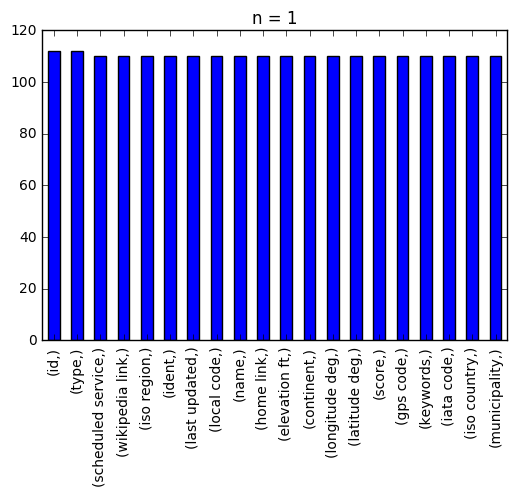

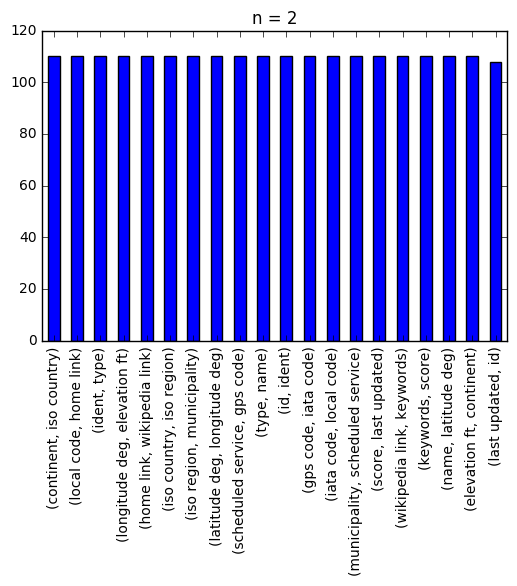

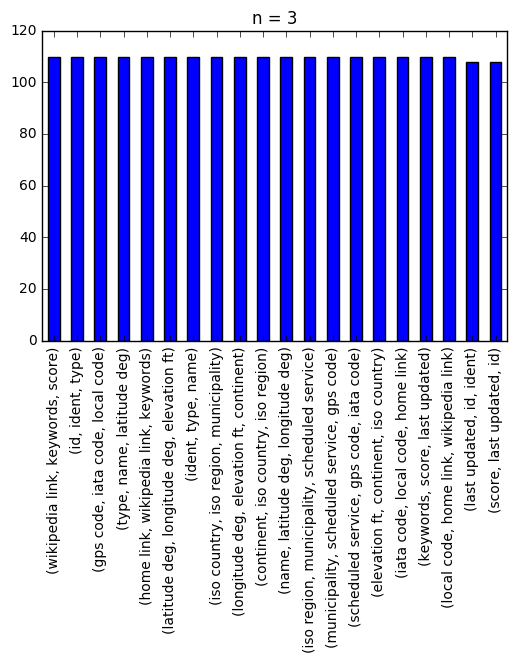

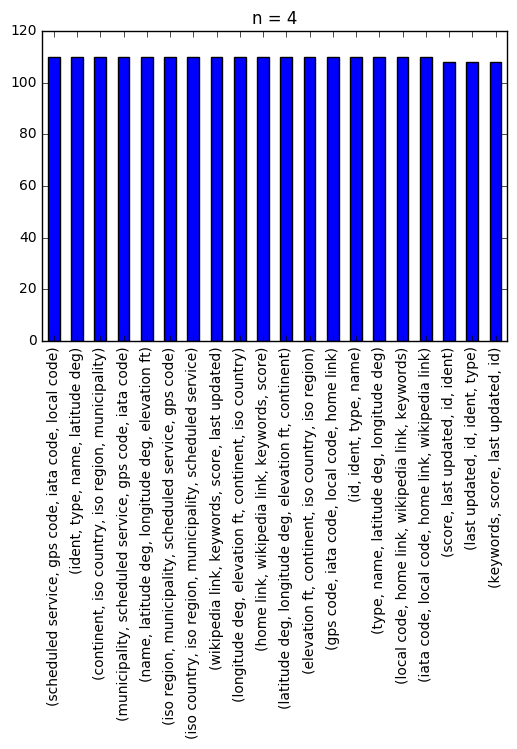

In [222]:
#A visualization of most frequent n-grams
freqs_n_1 = pd.Series(freqs.iloc[0, 1]).value_counts().head(20)
freqs_n_2 = pd.Series(freqs.iloc[1, 1]).value_counts().head(20)
freqs_n_3 = pd.Series(freqs.iloc[2, 1]).value_counts().head(20)
freqs_n_4 = pd.Series(freqs.iloc[3, 1]).value_counts().head(20)
#freqs_n_2[('latitude deg', 'longitude deg')] = 110
#freqs_n_2[('longitude deg', 'latitude deg')] = 0

freqs_n_1.plot(kind = 'bar')
plt.title('n = 1')
plt.figure(figsize = (20,30))
plt.show()
freqs_n_2.plot(kind = 'bar')
plt.title('n = 2')
plt.show()
freqs_n_3.plot(kind = 'bar')
plt.title('n = 3')
plt.show()
freqs_n_4.plot(kind = 'bar')
plt.title('n = 4')
plt.show()

In [ ]:
#next steps
#select an appropriate n-gram. Most likely leaning towards 2? Use as a feature. Goal is to say 'Given the 
#current n previous columns/tags, select the tag that has the highest probability with being associated with the 
#previous n-words / last x-words and next x-words. 

#another feature: sentiment of data matched to sentiment of tags? 'death' or fatalities --> negative. 
#so only consider tags that also have 'negative' sentiment. 
#probabilities.... 